# API의 코로나 데이터 EDA(탐색적 데이터 분석, Exploratory Data Analysis)

In [2]:
!sudo apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# url을 가져와서 문서로 만드는 작업
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 강사님_인증키.txt to 강사님_인증키.txt


In [5]:
with open(filename) as f:
    key = f.read()

In [6]:
# 공공데이터 키는 신청 후 1일정도 소요됨 => 본인키로 추후에 변경하기
numRows=10
staD=str(20200410)
endD=str(20210831)
numRows=30

url1='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='+ key
url2='&pageNo=1&numOfRows='+str(numRows)
url3='&startCreateDt='+staD+'&endCreateDt='+endD
url=url1+url2+url3   

print(url)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=S5FgzVMaI4VnSdDKqpL5KZxsUmhhyDuYp5uEtbgdkcjiNs15Aw4199t39wANmq%2BTUjhIm999jORaRGsMwuUDrQ%3D%3D&pageNo=1&numOfRows=30&startCreateDt=20200410&endCreateDt=20210831


In [7]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')
#soup

In [8]:
data=soup.find_all('item')
con_lst=[]

for item in data:
    DEF_CNT = item.find('defcnt').text # 확진자수'
    Deat_CNT = item.find('deathcnt').text # 사망자수
    GUBUN = item.find('gubun').text # 지역'
    INC_DEC = item.find('incdec').text #전일대비 증감'
    STD_DAY = item.find('stdday').text # 기준일'
    ISOL_ING_CNT = item.find('isolingcnt').text#격리자수'
    OVER_FLOW_CNT = item.find('overflowcnt').text #해외유입'
    LOCAL_OCC_CNT = item.find('localocccnt').text #지역감염'
    con_lst.append({'stdday':STD_DAY,'ji':GUBUN,'isolingcnt':ISOL_ING_CNT,
                    'defcnt':DEF_CNT,'incdec':INC_DEC,'deathcnt':Deat_CNT,
                    'local':LOCAL_OCC_CNT,'overflow':OVER_FLOW_CNT})

In [ ]:
# con_lst

In [14]:
# 아래와 같이 해도 됨. 그러면 con_lst 순서대로 나오고 columns를 하면 내가 순서를 변경할 수 있음.
df = pd.DataFrame(con_lst)

df = pd.DataFrame(con_lst, columns = ['stdday','ji','deathcnt','defcnt','isolingcnt','incdec','local','overflow'])

# df=pd.read_csv('....csv')
df.head()

,stdday,ji,deathcnt,defcnt,isolingcnt,incdec,local,overflow
0,2021년 08월 31일 00시,검역,13,5836,511,13,0,13
1,2021년 08월 31일 00시,제주,2,2602,270,9,8,1
2,2021년 08월 31일 00시,경남,31,9980,858,56,56,0
3,2021년 08월 31일 00시,경북,88,7100,618,27,27,0
4,2021년 08월 31일 00시,전남,19,2600,206,14,13,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      516 non-null    object
 1   ji          516 non-null    object
 2   deathcnt    516 non-null    object
 3   defcnt      516 non-null    object
 4   isolingcnt  516 non-null    object
 5   incdec      516 non-null    object
 6   local       516 non-null    object
 7   overflow    516 non-null    object
dtypes: object(8)
memory usage: 32.4+ KB


In [11]:
df.isna().sum() # 결측치 확인

stdday        0
ji            0
deathcnt      0
defcnt        0
isolingcnt    0
incdec        0
local         0
overflow      0
dtype: int64

## 형변환

In [12]:
# 방법1
df['deathcnt'] = df['deathcnt'].astype(int)
df['defcnt'] = df['defcnt'].astype(int)
df['isolingcnt'] = df['isolingcnt'].astype(int)
df['incdec'] = df['incdec'].astype(int)
df['local'] = df['local'].astype(int)
df['overflow'] = df['overflow'].astype(int)

In [ ]:
# 방법2
col = ['deathcnt','defcnt','isolingcnt','incdec','local','overflow']
for i in col:
    df[col] = df[col].astype(int)

In [15]:
# 방법3(권장)
for col in df.columns[2:]:
    df[col] = df[col].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      516 non-null    object
 1   ji          516 non-null    object
 2   deathcnt    516 non-null    int64 
 3   defcnt      516 non-null    int64 
 4   isolingcnt  516 non-null    int64 
 5   incdec      516 non-null    int64 
 6   local       516 non-null    int64 
 7   overflow    516 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 32.4+ KB


## 자료기술통계

In [17]:
df.describe() # defcnt의 편차가 상대적으로 큼, 75%가 10628이하.

,deathcnt,defcnt,isolingcnt,incdec,local,overflow
count,516.000000,516.000000,516.000000,516.000000,516.00000,516.000000
mean,216.153101,22719.133721,2626.494186,173.676357,168.50000,5.186047
std,475.594796,50167.372319,5870.341145,382.427085,372.40069,11.778550
min,1.000000,763.000000,70.000000,1.000000,0.00000,0.000000
25%,24.000000,3621.250000,332.000000,25.000000,23.00000,0.000000
50%,57.000000,5560.500000,602.000000,46.500000,46.00000,1.000000
75%,128.000000,10628.000000,1168.500000,90.000000,89.00000,3.000000
max,2285.000000,251415.000000,28214.000000,2221.000000,2144.00000,77.000000


In [18]:
df[df['defcnt']>100000]

,stdday,ji,deathcnt,defcnt,isolingcnt,incdec,local,overflow
18,2021년 08월 31일 00시,합계,2285,251415,27429,1370,1331,39
37,2021년 08월 30일 00시,합계,2284,250045,27403,1485,1424,61
56,2021년 08월 29일 00시,합계,2279,248560,27555,1619,1576,43
75,2021년 08월 28일 00시,합계,2276,246943,27678,1791,1736,55
94,2021년 08월 27일 00시,합계,2265,245152,28214,1838,1808,30
113,2021년 08월 26일 00시,합계,2257,243314,28186,1882,1829,53
132,2021년 08월 25일 00시,합계,2237,241433,28019,2154,2113,41
151,2021년 08월 24일 00시,합계,2228,239280,27859,1506,1468,38
170,2021년 08월 23일 00시,합계,2222,237772,27949,1416,1369,47
189,2021년 08월 22일 00시,합계,2215,236355,27864,1626,1588,38


In [19]:
df[df['ji']=='합계'] # 이상치 데이터

,stdday,ji,deathcnt,defcnt,isolingcnt,incdec,local,overflow
18,2021년 08월 31일 00시,합계,2285,251415,27429,1370,1331,39
37,2021년 08월 30일 00시,합계,2284,250045,27403,1485,1424,61
56,2021년 08월 29일 00시,합계,2279,248560,27555,1619,1576,43
75,2021년 08월 28일 00시,합계,2276,246943,27678,1791,1736,55
94,2021년 08월 27일 00시,합계,2265,245152,28214,1838,1808,30
113,2021년 08월 26일 00시,합계,2257,243314,28186,1882,1829,53
132,2021년 08월 25일 00시,합계,2237,241433,28019,2154,2113,41
151,2021년 08월 24일 00시,합계,2228,239280,27859,1506,1468,38
170,2021년 08월 23일 00시,합계,2222,237772,27949,1416,1369,47
189,2021년 08월 22일 00시,합계,2215,236355,27864,1626,1588,38


In [20]:
df[df['stdday']=='2021년 08월 31일 00시']

,stdday,ji,deathcnt,defcnt,isolingcnt,incdec,local,overflow
0,2021년 08월 31일 00시,검역,13,5836,511,13,0,13
1,2021년 08월 31일 00시,제주,2,2602,270,9,8,1
2,2021년 08월 31일 00시,경남,31,9980,858,56,56,0
3,2021년 08월 31일 00시,경북,88,7100,618,27,27,0
4,2021년 08월 31일 00시,전남,19,2600,206,14,13,1
5,2021년 08월 31일 00시,전북,60,3588,354,26,26,0
6,2021년 08월 31일 00시,충남,55,6937,1098,38,37,1
7,2021년 08월 31일 00시,충북,73,5152,455,15,15,0
8,2021년 08월 31일 00시,강원,59,5460,396,30,29,1
9,2021년 08월 31일 00시,경기,747,71081,8733,433,419,14


In [21]:
df['defcnt'].groupby(df['ji']).sum()

ji
강원     126546
검역     157110
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
합계    5557598
Name: defcnt, dtype: int64

## 전처리
- 합계와 검역자료를 제거
- 날짜데이터를 형식을 날짜형식으로 변경해서 년, 월, 일 단위로 쪼갬

In [22]:
# 조건에 맞는 데이터 제거하고 새로운 데이터 프레임 제작
# 방법1)
newDf=df[(df['ji']!='검역')&(df['ji']!='합계')]
newDf['defcnt'].groupby(df['ji']).sum()
# 방법2) newDf=df를 하고 조건에 맞는 자료만 drop(행단위로 axis=0)
# 방법3) newDf=df를 하고 조건에 맞는 자료를 nan으로 변경한 뒤 dropna로 제거

ji
강원     126546
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
Name: defcnt, dtype: int64

- 상관도

In [23]:
newDf.corr()

,deathcnt,defcnt,isolingcnt,incdec,local,overflow
deathcnt,1.000000,0.962850,0.942039,0.942731,0.941928,0.752914
defcnt,0.962850,1.000000,0.993543,0.968791,0.968815,0.731520
isolingcnt,0.942039,0.993543,1.000000,0.969242,0.969495,0.720412
incdec,0.942731,0.968791,0.969242,1.000000,0.999914,0.760173
local,0.941928,0.968815,0.969495,0.999914,1.000000,0.751582
overflow,0.752914,0.731520,0.720412,0.760173,0.751582,1.000000


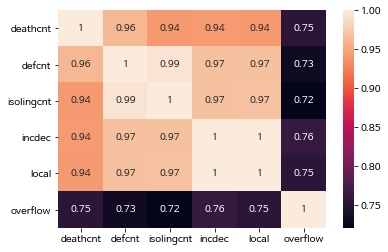

In [24]:
import seaborn as sns
sns.heatmap(newDf.corr(), annot=True)
plt.show()

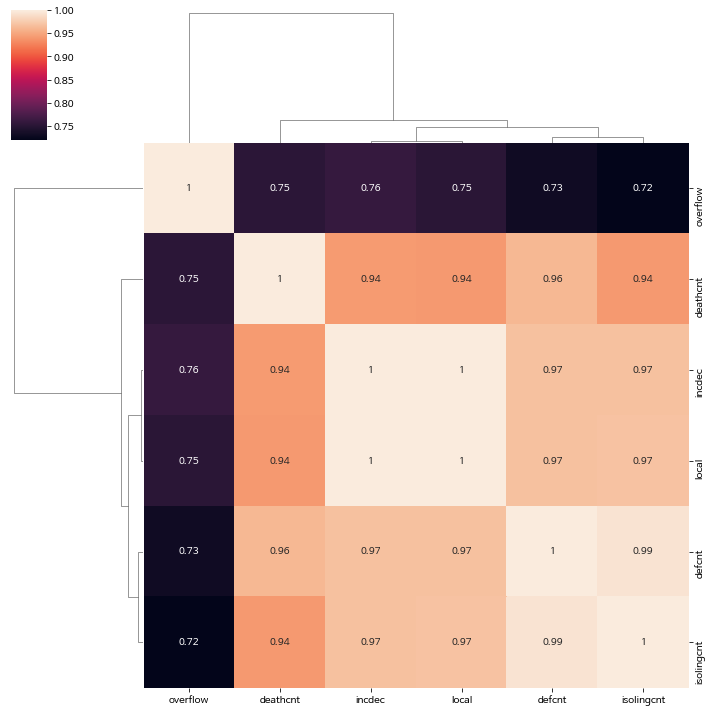

In [25]:
sns.clustermap(newDf.corr(), annot=True) # 연관성있는 변수들을 이어줌(의사결정트리)
plt.show()

- 날짜 형식 바꾸기

In [26]:
# 날짜 형식은 년-월-일
# 방법1) 속도가 오래걸림
newDf['Date'] = newDf['stdday'].str.split('일').str[0]
newDf['Date'] = newDf['Date'].str.replace('년','-')
newDf['Date'] = newDf['Date'].str.replace('월','-')
newDf['Date'] = newDf['Date'].str.replace(' ','')
newDf

,stdday,ji,deathcnt,defcnt,isolingcnt,incdec,local,overflow,Date
1,2021년 08월 31일 00시,제주,2,2602,270,9,8,1,2021-08-31
2,2021년 08월 31일 00시,경남,31,9980,858,56,56,0,2021-08-31
3,2021년 08월 31일 00시,경북,88,7100,618,27,27,0,2021-08-31
4,2021년 08월 31일 00시,전남,19,2600,206,14,13,1,2021-08-31
5,2021년 08월 31일 00시,전북,60,3588,354,26,26,0,2021-08-31
...,...,...,...,...,...,...,...,...,...
511,2021년 08월 04일 00시,울산,41,3262,145,15,14,1,2021-08-04
512,2021년 08월 04일 00시,대전,30,4459,1121,59,59,0,2021-08-04
513,2021년 08월 04일 00시,광주,24,3464,215,16,15,1,2021-08-04
514,2021년 08월 04일 00시,인천,66,9342,1144,83,83,0,2021-08-04


In [35]:
# 방법2) 훨씬 속도가 빠름
date_list = []
for i in newDf['stdday']:
    date = i.split('일')[0]
    date = date.replace('년','-')
    date = date.replace('월','-')
    date = date.replace(' ','')
    date_list.append(date)
newDf['Date'] = date_list
newDf.head()

,stdday,ji,deathcnt,defcnt,isolingcnt,incdec,local,overflow,Date
1,2021년 08월 31일 00시,제주,2,2602,270,9,8,1,2021-08-31
2,2021년 08월 31일 00시,경남,31,9980,858,56,56,0,2021-08-31
3,2021년 08월 31일 00시,경북,88,7100,618,27,27,0,2021-08-31
4,2021년 08월 31일 00시,전남,19,2600,206,14,13,1,2021-08-31
5,2021년 08월 31일 00시,전북,60,3588,354,26,26,0,2021-08-31


In [36]:
newDf.info() # 아직 Date의 Dtyepe이 object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 1 to 515
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      464 non-null    object
 1   ji          464 non-null    object
 2   deathcnt    464 non-null    int64 
 3   defcnt      464 non-null    int64 
 4   isolingcnt  464 non-null    int64 
 5   incdec      464 non-null    int64 
 6   local       464 non-null    int64 
 7   overflow    464 non-null    int64 
 8   Date        464 non-null    object
dtypes: int64(6), object(3)
memory usage: 56.2+ KB


In [37]:
from datetime import datetime, timedelta
newDf['Date'] = pd.to_datetime(newDf['Date']) # 날짜형으로 자료형을 바꿈
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 1 to 515
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   stdday      464 non-null    object        
 1   ji          464 non-null    object        
 2   deathcnt    464 non-null    int64         
 3   defcnt      464 non-null    int64         
 4   isolingcnt  464 non-null    int64         
 5   incdec      464 non-null    int64         
 6   local       464 non-null    int64         
 7   overflow    464 non-null    int64         
 8   Date        464 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 56.2+ KB


In [38]:
newDf['Date'].dt.year
newDf['Date'].dt.month
newDf['Date'].dt.day
newDf['Date'].dt.day_name()

1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
5        Tuesday
         ...    
511    Wednesday
512    Wednesday
513    Wednesday
514    Wednesday
515    Wednesday
Name: Date, Length: 464, dtype: object

In [39]:
# 연도별, 월별 등 날짜별로 그룹화하기 위함
newDf['year'] = newDf['Date'].dt.year
newDf['month'] = newDf['Date'].dt.month
newDf['dayName'] = newDf['Date'].dt.day_name()
newDf

,stdday,ji,deathcnt,defcnt,isolingcnt,incdec,local,overflow,Date,year,month,dayName
1,2021년 08월 31일 00시,제주,2,2602,270,9,8,1,2021-08-31,2021,8,Tuesday
2,2021년 08월 31일 00시,경남,31,9980,858,56,56,0,2021-08-31,2021,8,Tuesday
3,2021년 08월 31일 00시,경북,88,7100,618,27,27,0,2021-08-31,2021,8,Tuesday
4,2021년 08월 31일 00시,전남,19,2600,206,14,13,1,2021-08-31,2021,8,Tuesday
5,2021년 08월 31일 00시,전북,60,3588,354,26,26,0,2021-08-31,2021,8,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
511,2021년 08월 04일 00시,울산,41,3262,145,15,14,1,2021-08-04,2021,8,Wednesday
512,2021년 08월 04일 00시,대전,30,4459,1121,59,59,0,2021-08-04,2021,8,Wednesday
513,2021년 08월 04일 00시,광주,24,3464,215,16,15,1,2021-08-04,2021,8,Wednesday
514,2021년 08월 04일 00시,인천,66,9342,1144,83,83,0,2021-08-04,2021,8,Wednesday


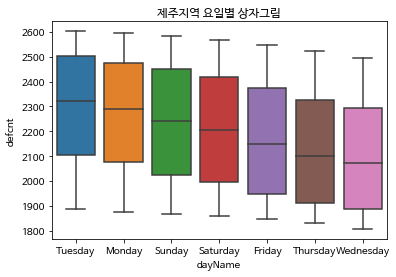

In [40]:
List = newDf['ji'].unique()
i = List[0]
tmp = newDf[newDf['ji']==i]
sns.boxplot(x='dayName', y='defcnt', data=tmp)
plt.title(f'{i}지역 요일별 상자그림')
plt.show()

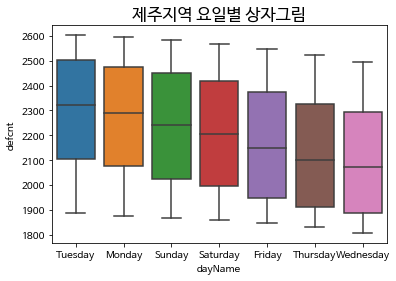

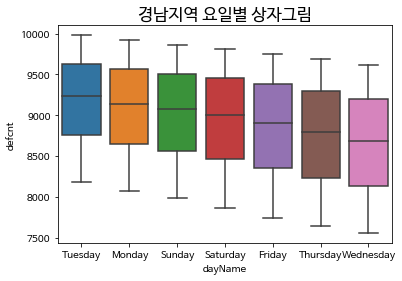

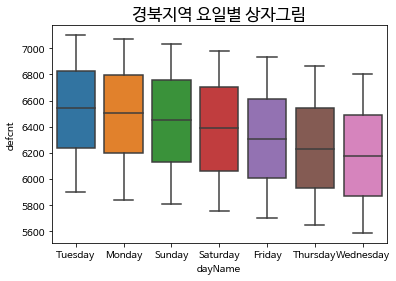

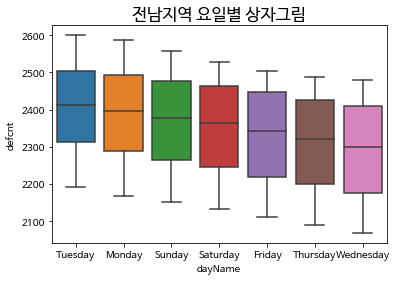

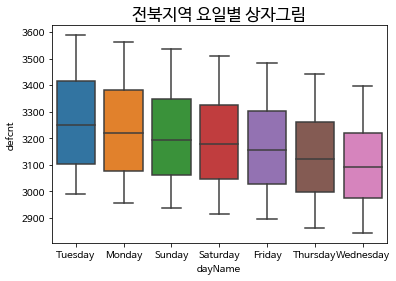

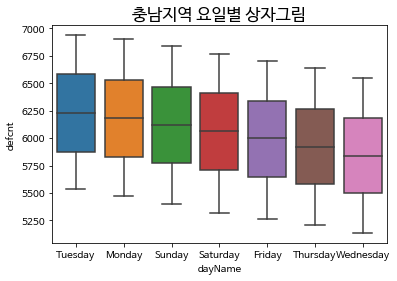

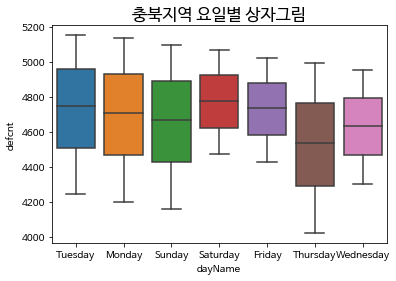

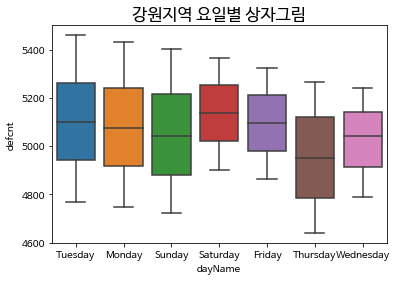

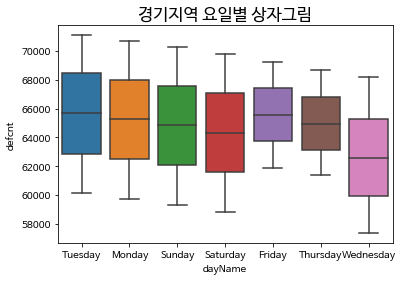

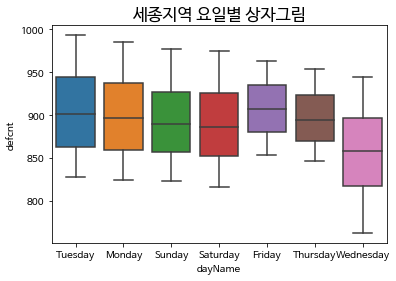

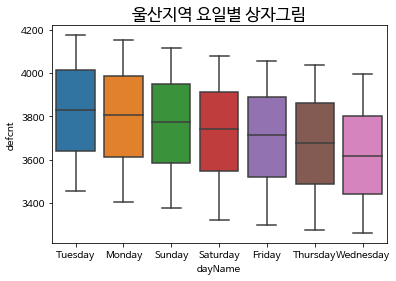

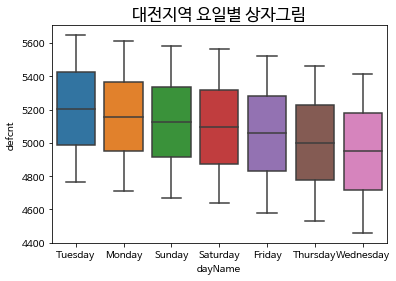

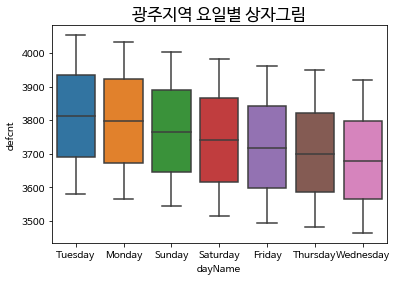

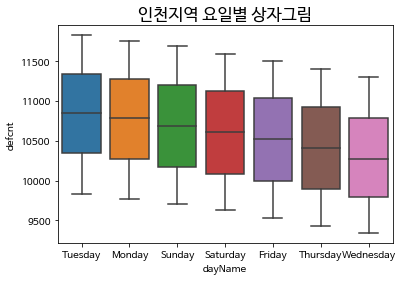

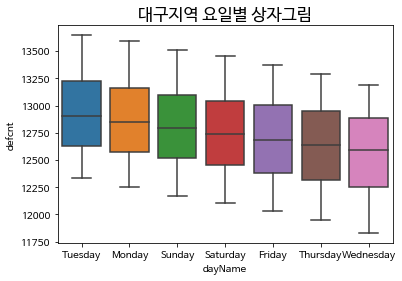

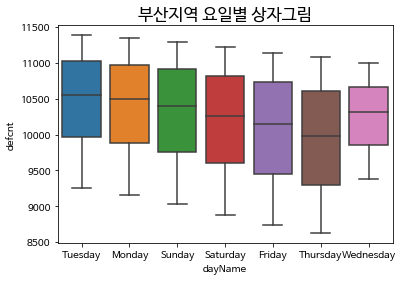

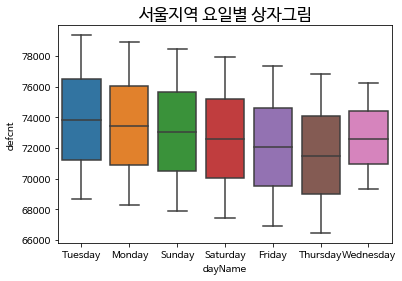

In [41]:
List = newDf['ji'].unique()
for i in List:
    tmp = newDf[newDf['ji']==i]
    sns.boxplot(x='dayName', y='defcnt', data=tmp)
    # sns.boxplot(x='month', y='defcnt', hue='dayName', data=tmp) # month가 다양한 경우
    plt.title(f'{i}지역 요일별 상자그림', fontsize=17)
    plt.show()